In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import defaultdict

In [2]:
df = pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df.shape

(150460, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

## Total runs score by each team in each match

In [5]:
run_analysis = df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()

In [6]:
run_analysis.head()

match_id  inning  batting_team               
1         1       Sunrisers Hyderabad            207
          2       Royal Challengers Bangalore    172
2         1       Mumbai Indians                 184
          2       Rising Pune Supergiant         187
3         1       Gujarat Lions                  183
Name: total_runs, dtype: int64

In [7]:
run_analysis = pd.DataFrame(run_analysis).reset_index()
run_analysis.head()

,match_id,inning,batting_team,total_runs
0,1,1,Sunrisers Hyderabad,207
1,1,2,Royal Challengers Bangalore,172
2,2,1,Mumbai Indians,184
3,2,2,Rising Pune Supergiant,187
4,3,1,Gujarat Lions,183


## Detail run analysis

In [8]:
detail_run_analysis = pd.crosstab([df['match_id'], df['inning'], df['batting_team']], df['total_runs'], margins=False)
score = np.array(run_analysis['total_runs'].values)
score = score.transpose()
detail_run_analysis['Final Score'] = score
detail_run_analysis.head()

total_runs                                    0   1   2  3   4  5   6  7  \
match_id inning batting_team                                               
1        1      Sunrisers Hyderabad          26  62  10  1  17  0   9  0   
         2      Royal Challengers Bangalore  44  48   8  0  15  0   8  0   
2        1      Mumbai Indians               41  55   5  0  12  1  11  0   
         2      Rising Pune Supergiant       29  59  10  0  18  0   6  0   
3        1      Gujarat Lions                35  55   6  0  20  0   6  0   

total_runs                                   Final Score  
match_id inning batting_team                              
1        1      Sunrisers Hyderabad                  207  
         2      Royal Challengers Bangalore          172  
2        1      Mumbai Indians                       184  
         2      Rising Pune Supergiant               187  
3        1      Gujarat Lions                        183

## Top 5 Highest Scoring Teams

In [9]:
highest_scoring_team = df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().sort_values(ascending = False).head()

In [10]:
highest_scoring_team = pd.DataFrame(highest_scoring_team)

In [11]:
highest_scoring_team.head()

,,,total_runs
match_id,inning,batting_team,
411,1,Royal Challengers Bangalore,263
620,1,Royal Challengers Bangalore,248
206,1,Chennai Super Kings,246
61,1,Chennai Super Kings,240
562,1,Royal Challengers Bangalore,235


In [12]:
highest_scoring_team = highest_scoring_team.reset_index()

In [13]:
highest_scoring_team.head()

,match_id,inning,batting_team,total_runs
0,411,1,Royal Challengers Bangalore,263
1,620,1,Royal Challengers Bangalore,248
2,206,1,Chennai Super Kings,246
3,61,1,Chennai Super Kings,240
4,562,1,Royal Challengers Bangalore,235


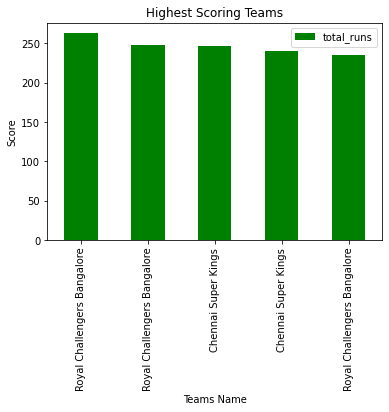

In [14]:
highest_scoring_team.plot.bar(x = 'batting_team', y = 'total_runs', color = 'green')
plt.xlabel('Teams Name')
plt.ylabel('Score')
plt.title('Highest Scoring Teams')
plt.show()

## Economy Rate of Sunil Narine

In [15]:
narine = df[df['bowler'] == 'SP Narine']
narine

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
508,3,1,Gujarat Lions,Kolkata Knight Riders,3,1,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
509,3,1,Gujarat Lions,Kolkata Knight Riders,3,2,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
510,3,1,Gujarat Lions,Kolkata Knight Riders,3,3,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
511,3,1,Gujarat Lions,Kolkata Knight Riders,3,4,BB McCullum,JJ Roy,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
512,3,1,Gujarat Lions,Kolkata Knight Riders,3,5,JJ Roy,BB McCullum,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149829,634,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,NV Ojha,Yuvraj Singh,SP Narine,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149830,634,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,4,NV Ojha,Yuvraj Singh,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
149831,634,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,5,NV Ojha,Yuvraj Singh,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149832,634,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,6,Yuvraj Singh,NV Ojha,SP Narine,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [16]:
runs_given = narine['total_runs'].sum()
over_bowled = narine['over'].count()
over_bowled = over_bowled/6
economy = runs_given/over_bowled
economy

6.395705521472393

In [17]:
print('Economy Of Sunil Narine:' ,economy)

Economy Of Sunil Narine: 6.395705521472393


## Strike Rate OF Chris Gayle

In [18]:
c_gayle=df[df['batsman']=='CH Gayle']
c_gayle.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [19]:
run_scored = c_gayle['total_runs'].sum()
ball_faced = c_gayle['ball'].count()
strike_rate = run_scored/ball_faced * 100
strike_rate

154.58135860979462

In [20]:
print('Strike Rate Of Chris Gayle is ', strike_rate)

Strike Rate Of Chris Gayle is  154.58135860979462


In [21]:
run_scored

3914

In [22]:
ball_faced

2532

## Average Score Of Suresh Raina

In [23]:
s_raina = df[df['batsman'] == 'SK Raina']
s_raina

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
515,3,1,Gujarat Lions,Kolkata Knight Riders,4,2,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
516,3,1,Gujarat Lions,Kolkata Knight Riders,4,3,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
520,3,1,Gujarat Lions,Kolkata Knight Riders,5,1,SK Raina,BB McCullum,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
526,3,1,Gujarat Lions,Kolkata Knight Riders,6,1,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
527,3,1,Gujarat Lions,Kolkata Knight Riders,6,2,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149982,635,1,Gujarat Lions,Sunrisers Hyderabad,3,1,SK Raina,BB McCullum,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
149983,635,1,Gujarat Lions,Sunrisers Hyderabad,3,2,SK Raina,BB McCullum,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
149984,635,1,Gujarat Lions,Sunrisers Hyderabad,3,3,SK Raina,BB McCullum,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149988,635,1,Gujarat Lions,Sunrisers Hyderabad,4,1,SK Raina,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [24]:
total_run_scored = s_raina['total_runs'].sum()
total_matched_played = s_raina['match_id'].nunique()
average = total_run_scored/ total_matched_played

In [25]:
total_run_scored

4745

In [26]:
total_matched_played

157

In [27]:
print('Average Score Of Suresh Raina is', average)

Average Score Of Suresh Raina is 30.222929936305732


## Top 5 Fielders Of IPL

In [28]:
fielder = df.groupby('fielder')['dismissal_kind'].count().sort_values(ascending = False)
fielder = fielder.head()

In [29]:
fielder = pd.DataFrame(fielder)
fielder.head()

,dismissal_kind
fielder,
KD Karthik,127
MS Dhoni,126
RV Uthappa,115
AB de Villiers,101
SK Raina,96


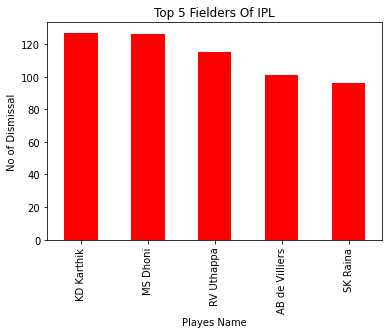

In [30]:
fielder.plot.bar(color = 'red', legend = None)
plt.title('Top 5 Fielders Of IPL')
plt.xlabel('Playes Name')
plt.ylabel('No of Dismissal')
plt.show()

## Top 5 Wicket Takes Of IPL

In [31]:
wickets = df.groupby('bowler')['dismissal_kind'].count().sort_values(ascending = False).head()
wickets

bowler
SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
Name: dismissal_kind, dtype: int64

In [32]:
wickets = pd.DataFrame(wickets)

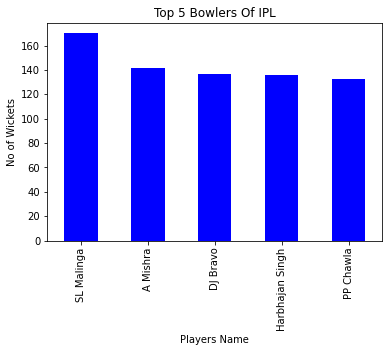

In [33]:
wickets.plot.bar(color = 'blue', legend = None)
plt.title('Top 5 Bowlers Of IPL')
plt.xlabel('Players Name')
plt.ylabel('No of Wickets')
plt.show()

## Top 5 Highest run scorer of IPL

In [34]:
scorer = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head()
scorer

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

In [35]:
scorer = pd.DataFrame(scorer)

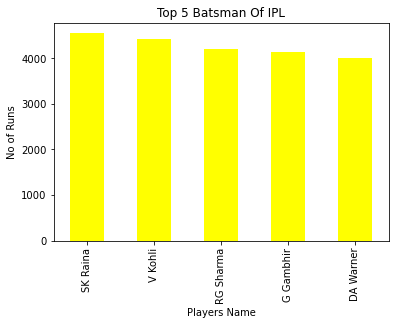

In [36]:
scorer.plot.bar(color = 'yellow', legend = None)
plt.title('Top 5 Batsman Of IPL')
plt.xlabel('Players Name')
plt.ylabel('No of Runs')
plt.show()

## Top 5 Teams with Highest Wins

In [37]:
inng1 = df.loc[df['inning'] == 1]
inng2 = df.loc[df['inning'] == 2]
inng3 = df.loc[df['inning'] == 3]
inng4 = df.loc[df['inning'] == 4]

In [38]:
inng1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [39]:
inng2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [40]:
inng4.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8097,34,4,Gujarat Lions,Mumbai Indians,1,1,AJ Finch,BB McCullum,JJ Bumrah,1,...,0,0,1,0,0,1,1,NaN,NaN,NaN
8098,34,4,Gujarat Lions,Mumbai Indians,1,2,AJ Finch,BB McCullum,JJ Bumrah,1,...,0,1,0,0,0,1,1,NaN,NaN,NaN
8099,34,4,Gujarat Lions,Mumbai Indians,1,3,BB McCullum,AJ Finch,JJ Bumrah,1,...,0,0,0,0,0,1,1,NaN,NaN,NaN
8100,34,4,Gujarat Lions,Mumbai Indians,1,4,BB McCullum,AJ Finch,JJ Bumrah,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8101,34,4,Gujarat Lions,Mumbai Indians,1,5,BB McCullum,AJ Finch,JJ Bumrah,1,...,1,0,0,0,0,1,1,NaN,NaN,NaN


In [41]:
inng1 = inng1.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()
inng1

match_id  inning  batting_team               
1         1       Sunrisers Hyderabad            207
2         1       Mumbai Indians                 184
3         1       Gujarat Lions                  183
4         1       Rising Pune Supergiant         163
5         1       Royal Challengers Bangalore    157
                                                ... 
632       1       Delhi Daredevils               138
633       1       Gujarat Lions                  158
634       1       Sunrisers Hyderabad            162
635       1       Gujarat Lions                  162
636       1       Sunrisers Hyderabad            208
Name: total_runs, Length: 636, dtype: int64

In [42]:
inng2 = inng2.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()
inng2

match_id  inning  batting_team               
1         2       Royal Challengers Bangalore    172
2         2       Rising Pune Supergiant         187
3         2       Kolkata Knight Riders          184
4         2       Kings XI Punjab                164
5         2       Delhi Daredevils               142
                                                ... 
632       2       Royal Challengers Bangalore    139
633       2       Royal Challengers Bangalore    159
634       2       Kolkata Knight Riders          140
635       2       Sunrisers Hyderabad            163
636       2       Royal Challengers Bangalore    200
Name: total_runs, Length: 634, dtype: int64

In [43]:
inng3 = inng3.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()
inng3

match_id  inning  batting_team               
34        3       Mumbai Indians                 11
126       3       Kolkata Knight Riders          15
190       3       Chennai Super Kings             9
388       3       Sunrisers Hyderabad            20
401       3       Royal Challengers Bangalore    15
476       3       Kolkata Knight Riders          11
536       3       Kings XI Punjab                15
Name: total_runs, dtype: int64

In [44]:
inng4 = inng4.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()
inng4

match_id  inning  batting_team               
34        4       Gujarat Lions                   6
126       4       Rajasthan Royals               18
190       4       Kings XI Punjab                10
388       4       Royal Challengers Bangalore    15
401       4       Delhi Daredevils               11
476       4       Rajasthan Royals               11
536       4       Rajasthan Royals                6
Name: total_runs, dtype: int64

In [45]:
all_matches = pd.merge(inng1, inng2, on = 'match_id')
all_matches.head()

,total_runs_x,total_runs_y
match_id,,
1,207,172
2,184,187
3,183,184
4,163,164
5,157,142


In [46]:
super_over_matches = pd.merge(inng3, inng4, on = 'match_id')
super_over_matches.head()

,total_runs_x,total_runs_y
match_id,,
34,11,6
126,15,18
190,9,10
388,20,15
401,15,11


In [47]:
super_over_matches.rename({'total_runs_x': 'total_runs_x1', 'total_runs_y': 'total_runs_y1'})

,total_runs_x,total_runs_y
match_id,,
34,11,6
126,15,18
190,9,10
388,20,15
401,15,11
476,11,11
536,15,6


In [48]:
all_matches.head()

,total_runs_x,total_runs_y
match_id,,
1,207,172
2,184,187
3,183,184
4,163,164
5,157,142


In [49]:
ut = []
for i in range(len(all_matches)):
    a = all_matches['total_runs_x'].iloc[i]
    b = all_matches['total_runs_y'].iloc[i]
    if a > b:
        ut.append('Team1 Won')
    elif a < b:
        ut.append('Team2 Won')
    else:
        ut.append('Draw')
        
all_matches['Result'] = ut
all_matches = pd.DataFrame(all_matches)
all_matches.head()

,total_runs_x,total_runs_y,Result
match_id,,,
1,207,172,Team1 Won
2,184,187,Team2 Won
3,183,184,Team2 Won
4,163,164,Team2 Won
5,157,142,Team1 Won


In [50]:
a = all_matches['total_runs_y'].iloc[0]
a

172

In [51]:
#Comparing Scores Of Both Teams And Storing The Result In New Column Named Super_Over_Result For Super Overs
ut1=[]
for i in range(len(super_over_matches)):
    a1=all_matches['total_runs_x'].iloc[i]
    b1=all_matches['total_runs_y'].iloc[i]
    if a1>b1:
        ut1.append("Team1 won")
    elif a1<b1:
        ut1.append("Team 2 won")
    elif a1==b1:
        ut1.append("Draw")
super_over_matches['super_over_result']=ut1
super_over_matches=pd.DataFrame(super_over_matches)
super_over_matches

,total_runs_x,total_runs_y,super_over_result
match_id,,,
34,11,6,Team1 won
126,15,18,Team 2 won
190,9,10,Team 2 won
388,20,15,Team 2 won
401,15,11,Team1 won
476,11,11,Team 2 won
536,15,6,Team 2 won


In [52]:
all_matches['super_over_result'] = super_over_matches['super_over_result']
all_matches = all_matches.fillna('No Super over')

In [53]:
all_matches.reset_index(inplace=True)

In [54]:
all_matches.head()

,match_id,total_runs_x,total_runs_y,Result,super_over_result
0,1,207,172,Team1 Won,No Super over
1,2,184,187,Team2 Won,No Super over
2,3,183,184,Team2 Won,No Super over
3,4,163,164,Team2 Won,No Super over
4,5,157,142,Team1 Won,No Super over


In [55]:
batt=[]
m_id1=[]
for i in range(0,150458):
    if df['batting_team'].iloc[i]!=df['batting_team'].iloc[i+1]:
        batt.append(df['batting_team'].iloc[i])
        m_id1.append(df['match_id'].iloc[i])
    else:
        pass

In [56]:
m_id1 = pd.DataFrame(m_id1)

In [57]:
m_id1.head()

,0
0,1
1,1
2,2
3,2
4,3


In [58]:
m_id1['Team1'] = batt

In [59]:
m_id1

,0,Team1
0,1,Sunrisers Hyderabad
1,1,Royal Challengers Bangalore
2,2,Mumbai Indians
3,2,Rising Pune Supergiant
4,3,Gujarat Lions
...,...,...
1263,633,Royal Challengers Bangalore
1264,634,Sunrisers Hyderabad
1265,634,Kolkata Knight Riders
1266,635,Gujarat Lions


In [60]:
bat1 = []
for i in range(0, 1268, 2):
    bat1.append(m_id1.iloc[i])

In [61]:
bat1

[0                          1
 Team1    Sunrisers Hyderabad
 Name: 0, dtype: object,
 0                     2
 Team1    Mumbai Indians
 Name: 2, dtype: object,
 0                    3
 Team1    Gujarat Lions
 Name: 4, dtype: object,
 0                             4
 Team1    Rising Pune Supergiant
 Name: 6, dtype: object,
 0                                  5
 Team1    Royal Challengers Bangalore
 Name: 8, dtype: object,
 0                    6
 Team1    Gujarat Lions
 Name: 10, dtype: object,
 0                            7
 Team1    Kolkata Knight Riders
 Name: 12, dtype: object,
 0                                  8
 Team1    Royal Challengers Bangalore
 Name: 14, dtype: object,
 0                       9
 Team1    Delhi Daredevils
 Name: 16, dtype: object,
 0                         10
 Team1    Sunrisers Hyderabad
 Name: 18, dtype: object,
 0                     11
 Team1    Kings XI Punjab
 Name: 20, dtype: object,
 0                                 12
 Team1    Royal Challengers

In [62]:
bat2 = []
for i in range(1, 1268, 2):
    bat2.append(m_id1.iloc[i])

In [63]:
m_id1.head()

,0,Team1
0,1,Sunrisers Hyderabad
1,1,Royal Challengers Bangalore
2,2,Mumbai Indians
3,2,Rising Pune Supergiant
4,3,Gujarat Lions


In [64]:
bat1 = pd.DataFrame(bat1)
bat2 = pd.DataFrame(bat2)

In [65]:
bat1

,0,Team1
0,1,Sunrisers Hyderabad
2,2,Mumbai Indians
4,3,Gujarat Lions
6,4,Rising Pune Supergiant
8,5,Royal Challengers Bangalore
...,...,...
1258,631,Kolkata Knight Riders
1260,632,Delhi Daredevils
1262,633,Gujarat Lions
1264,634,Sunrisers Hyderabad


In [66]:
bat2

,0,Team1
1,1,Royal Challengers Bangalore
3,2,Rising Pune Supergiant
5,3,Kolkata Knight Riders
7,4,Kings XI Punjab
9,5,Delhi Daredevils
...,...,...
1259,631,Sunrisers Hyderabad
1261,632,Royal Challengers Bangalore
1263,633,Royal Challengers Bangalore
1265,634,Kolkata Knight Riders


In [67]:
bat2.rename(columns={'Team1':'Team2'})

,0,Team2
1,1,Royal Challengers Bangalore
3,2,Rising Pune Supergiant
5,3,Kolkata Knight Riders
7,4,Kings XI Punjab
9,5,Delhi Daredevils
...,...,...
1259,631,Sunrisers Hyderabad
1261,632,Royal Challengers Bangalore
1263,633,Royal Challengers Bangalore
1265,634,Kolkata Knight Riders


In [68]:
batting = pd.merge(bat1, bat2, on = 0)
batting.head()

,0,Team1_x,Team1_y
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2,Mumbai Indians,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils


In [69]:
batting.rename(columns={0:'Match_Id'}, inplace=True)

In [70]:
batting.rename(columns={'Team1_x':'Team1', 'Team1_y':'Team2'}, inplace=True)

In [71]:
batting.head()

,Match_Id,Team1,Team2
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2,Mumbai Indians,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils


In [72]:
batting.rename(columns={'Match_Id':'match_id'}, inplace=True)

In [73]:
batting.head()

,match_id,Team1,Team2
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2,Mumbai Indians,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils


In [74]:
final = batting.merge(all_matches, on='match_id')
final.head()

,match_id,Team1,Team2,total_runs_x,total_runs_y,Result,super_over_result
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,172,Team1 Won,No Super over
1,2,Mumbai Indians,Rising Pune Supergiant,184,187,Team2 Won,No Super over
2,3,Gujarat Lions,Kolkata Knight Riders,183,184,Team2 Won,No Super over
3,4,Rising Pune Supergiant,Kings XI Punjab,163,164,Team2 Won,No Super over
4,5,Royal Challengers Bangalore,Delhi Daredevils,157,142,Team1 Won,No Super over


In [75]:
for i in range(len(final)):
    if final['Result'].iloc[i] == 'Team1 Won':
        final['Result'].iloc[i] = final['Team1'].iloc[i]

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
final.head()

,match_id,Team1,Team2,total_runs_x,total_runs_y,Result,super_over_result
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,172,Sunrisers Hyderabad,No Super over
1,2,Mumbai Indians,Rising Pune Supergiant,184,187,Team2 Won,No Super over
2,3,Gujarat Lions,Kolkata Knight Riders,183,184,Team2 Won,No Super over
3,4,Rising Pune Supergiant,Kings XI Punjab,163,164,Team2 Won,No Super over
4,5,Royal Challengers Bangalore,Delhi Daredevils,157,142,Royal Challengers Bangalore,No Super over


In [77]:
for i in range(len(final)):
    if final['Result'].iloc[i] == 'Team2 Won':
        final['Result'].iloc[i] = final['Team2'].iloc[i]

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
final.head()

,match_id,Team1,Team2,total_runs_x,total_runs_y,Result,super_over_result
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,172,Sunrisers Hyderabad,No Super over
1,2,Mumbai Indians,Rising Pune Supergiant,184,187,Rising Pune Supergiant,No Super over
2,3,Gujarat Lions,Kolkata Knight Riders,183,184,Kolkata Knight Riders,No Super over
3,4,Rising Pune Supergiant,Kings XI Punjab,163,164,Kings XI Punjab,No Super over
4,5,Royal Challengers Bangalore,Delhi Daredevils,157,142,Royal Challengers Bangalore,No Super over


In [79]:
for i in range(len(final)):
    if final['super_over_result'].iloc[i] == 'Team1 Won':
        final['super_over_result'].iloc[i] = final['Team1'].iloc[i]

In [80]:
for i in range(len(final)):
    if final['super_over_result'].iloc[i] == 'Team2 Won':
        final['super_over_result'].iloc[i] = final['Team2'].iloc[i]

In [81]:
final.rename(columns={'match_id': 'Match_Id','total_runs_x': 'Team1 Score', 'total_runs_y':'Team2 Score'}, inplace = True)
final.head()

,Match_Id,Team1,Team2,Team1 Score,Team2 Score,Result,super_over_result
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,172,Sunrisers Hyderabad,No Super over
1,2,Mumbai Indians,Rising Pune Supergiant,184,187,Rising Pune Supergiant,No Super over
2,3,Gujarat Lions,Kolkata Knight Riders,183,184,Kolkata Knight Riders,No Super over
3,4,Rising Pune Supergiant,Kings XI Punjab,163,164,Kings XI Punjab,No Super over
4,5,Royal Challengers Bangalore,Delhi Daredevils,157,142,Royal Challengers Bangalore,No Super over


In [82]:
top5 = final['Result'].value_counts().head()
top5

Mumbai Indians                 82
Delhi Daredevils               75
Kolkata Knight Riders          75
Royal Challengers Bangalore    74
Kings XI Punjab                70
Name: Result, dtype: int64

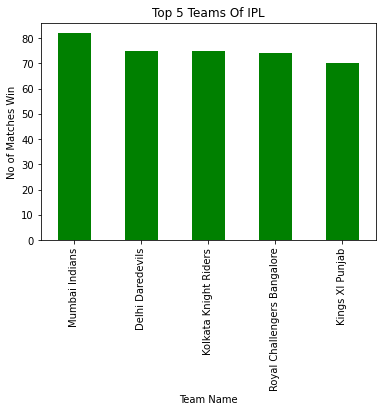

In [83]:
top5.plot.bar(color = 'green', legend = None)
plt.title('Top 5 Teams Of IPL')
plt.xlabel('Team Name')
plt.ylabel('No of Matches Win')
plt.show()